##Laporan Proyek 2 Recommendation System Machine Learning - Makrufiah Sakatri

### 1. Project Overview



Destinasi wisata adalah tujuan yang dikunjungi baik oleh wisatawan lokal maupun internasional untuk liburan atau menikmati pesona alam, budaya, dan atraksi tertentu. Setiap destinasi memiliki daya tarik dan keunikan tersendiri, seperti keindahan alam, nilai sejarah, atau aktivitas menarik yang dapat menghibur pengunjung.

Indonesia sendiri memiliki ratusan hingga ribuan destinasi wisata alam dan budaya yang kaya, sehingga banyak menarik perhatian wisatawan baik lokal dan mancanegara untuk menikmati khas alam dan budaya di Indonesia. Sektor wisata dengan keragaman alam bidaya di Indonesia dapat meningkatkan perekonomian Indonesia. Sehingga penting bagi pihak destinasi wisata di Indonesia untuk meningkatkan dan mempertahankan wisatawan baik lokal maupun mancanegara menjadikan destinasi wisata di Indonesia merupakan destinasi yang terbaik

Setiap wisatawan memiliki preferensi atraksi atau keunikan yang ingin dinikmati. Banyak calon wisatawan ingin mencoba atau mendatangi wisata yang baru atau memiliki review yang baik. Seringkali calon turis menentukan tujuan destinasinya berdasarkan pengalaman bagi turis yang memiliki riwayat kunjungan ke wisata tersebut. Namun karena banyaknya jenis dan lokasi wisata di Indonesia maka akan terlalu banyak informasi yang didapat dan kurang tepat sasaran pada calon turis sesuai preferensinya tersebut. Dengan perkembangan Machine learning, faktor tersebut dapat dibantu dengan membangun sistem yang dapat menilai atau merekomendasikan tujuan wisata sesuai dengan ciri khas yang diinginkan oleh pengunjung [referensi jurnal](http://jurnal.upnyk.ac.id/index.php/telematika/article/view/3023/2443).

### 2. Business Understanding

**- Problem Statement**

Indonesia memiliki ragam wisata yang didatangi banyak wisatawan. Dengan keragaman wisata dan banyaknya wisatawan dapat menghasilkan Data Mining yang merekam data-data transaksi wisatawan berkunjung di Indonesia. Sehingga, dapat dimanfaatkan untuk membangun sistem rekomendasi bertujuan menggali informasi dan mencari wisatawan baru.
Selain itu, banyak wisatawan mendatangi destinasi wisata sesuai dengan preferensi mereka, agar tujuan yang didatangi dapat memenuhi ekspetasi. Perlu adanya sistem rekomendasi yang dapat membaca preferensi calon wisatawan dan menyesuaikan referensi wisatawan lainnya yang memiliki riwayat menikmati wisata yang sama dengan preferensi calon wisatawan. Sehingga rekomendasi wisata akan menyesuaikan dengan preferensi calon wisatawan, dapat meningkatkan ekspetasi setelah berkunjung sesuai rekomendasi dan juga dapat menaikkan daya tarik wisata yang dapat meningkatkan perekonomian Indonesia.


Berdasarkan latar belakang tersebut project ini memiliki batasan masalah sebagai berikut:
1. **Bagaimana langkah-langkah untuk membuat sistem rekomendasi untuk calon pengunjung berdasarkan referensi riwayat pengunjung?**
  --> Melakukan metode sederhana CRISP-DM (Cross-Industry Standard Process for Data Mining) yaitu mengumpulkan, membersihkan dan menganalisis data. selanjutnya melakukan fitur engineering untuk membangun model sistem rekomendasi.
2. **Bagaimana atribut-atribut referensi pengunjung-pengunjung untuk menentukan destinasi wisata?**
  --> Menganalisis referensi data pengunjung wisata sebagai penilaian destinasi wisata
3. **Bagaimana cara membangun model Machine Learning sebagai solusi untuk merekomendasikan destinasi wisata untuk calon pengunjung berdasarakan preferensi pengunjung tersebut?**
  --> Analisis data dan membangun model menggunakan Deep Learning dengan eksplorasi hyperparameter berdasarkan rating dan ciri khas destinasi wisata melihat pada MSE, MAE dan R2 sebagai parameter model yang memiliki error paling kecil

  
**- Goals**

Sistem rekomendasi destinasi wisata bertujuan bagi calon pengunjung untuk:
1.   **Merekomendasikan tujuan wisata sesuai prefernsinya berdasarkan referensi riwayat pengunjung-pengunjung sebelumnya yang memiliki kesamaan preferensi tujuan wisata**
2.   **Menilai referensi pengunjung untuk menentukan destinasi wisata**,
3.  **Meningkatkan kepuasan para pengunjung wisaata sesuai preferensinya**,
4. **Mengurangi penilaian rendah pada destinasi wisata karena kurang sesuainya terhadap preferensi calon pengunjung**

**- Solution statements**
Menggunakan content based filtering cosine similarity, collaborative filtering algoritma recommenderNet dengan library keras dan SVD dengan library surprise yang dapat terukur baik menggunakan RMSE dan MAE

### 3. Data Understanding

Data yang digunakan bersumber [Mendeley Data](https://data.mendeley.com/datasets/h58s544674/1), oleh kontributor *huda, choirul huda (2023), “Tourism Dataset”, Mendeley Data, V1, doi: 10.17632/h58s544674.1*. Data tersebut berisi transaksi turis pada 3 lokasi wisata yang terpopuler di Indonesia yaitu Bali, Malang dan Yogyakarta dari riwayat turis yang direkam oleh website TripAdvisor rentang waktu Oktober 2022 - January 2023. Data terdapat 9 data format xlsx. Berikut penjelasan kolom-kolom pada masing-masing data:

1. Data City.xlsx -> master data kota persona turis. [9143 baris, 3 kolom]
  - CityId : integer berisi identifikasi unik merepresentasikan sebuah kota | 9143 non-null
  - CityName : string berisi informasi nama kota | 9142 non-null
  - CountryId : integer berisi identifikasi unik merepresentasikan sebuah negara |9143 non-null

  Data terdapat nilai null, namun tabel ini tidak diperlukan drop data karena akan digunakan referensi dari penggabungan data.
2. Data Continent.xlsx -> master data benua persona turis. [6 kolom, 2 baris]
  - ContenetId : integer berisi identifikasi unik merepresentasikan sebuah benua | 6 non-null
  - Contenent : string berisi informasi nama benua | 6 non-null

  Tidak ada nilai null
3. Data Country.xlsx -> master data negara persona turis. [165 baris, 3 kolom]
  - CountryId : integer berisi identifikasi unik merepresentasikan sebuah negara | 165 non-null
  - Country : sting berisi informasi nama wilayah | 165 non-null
  - RegionId : integer berisi identifikasi unik merepresentasikan sebuah wilayah | 165 non-null

  Tidak ada nilai null
4. Data Item.xlsx -> master data destinasi wisata. [30 baris, 5 kolom
  - Attractionid : integer berisi identifikasi unik merepresentasikan sebuah wisata | 30 non-null
  - AttractionCityId : integer berisi identifikasi unik merepresentasikan sebuah lokasi kota wisata | 30 non-null
  - AttractionTypeId : integer berisi identifikasi unik merepresentasikan sebuah tipe wisata | 30 non-null
  - Attraction : string berisi informasi nama wisata |  30 non-null
  - AttractionAddress : string berisi informasi alamat wisata | 30 non-null

  Tidak ada nilai null
5. Data Mode.xlsx -> master data jenis kunjungan turis. [6 baris, 2 kolom]
  - VisitModeId : integer berisi identifikasi unik merepresentasikan sebuah jenis kunjungan wisatawan | 6 non-null
  - VisitMode : string berisi informasi jenis kunjungan wisatawan |  6 non-null

  Tidak ada nilai null, namun pada visit mode terdapat nilai tidak konsisten yaitu nilai "-". Hal ini tidak perlu di drop karena akan digunakan referensi penggabungan data
6. Data Region.xlsx -> master data daerah persona turis. [22 baris, 3 kolom]
  - Region : string berisi informasi nama negara | 22 non-null
  - RegionId : integer berisi identifikasi unik merepresentasikan sebuah negara | 22 non-null
  - ContentId : integer berisi identifikasi unik merepresentasikan sebuah benua | 22 non-null

  Tidak ada nilai null
7. Data Transaction.xlsx -> data transaksi turis. [52930 baris,7 kolom]
  - TransactionId : integer berisi identifikasi unik merepresentasikan sebuah transaksi | 52930 non-null
  - UserId : integer berisi identifikasi unik merepresentasikan sebuah user/wisatawan | 52930 non-null
  - VisitYear : datetime informasi waktu tahun kunjungan wisatawan | 52930 non-null
  - VisitMonth : datetime informasi waktu bulan kunjungan wisatawan | 52930 non-null
  - VisitMode : string berisi informasi jenis kunjungan wisatawan | 52930 non-null
  - AttractionId : integer berisi identifikasi unik merepresentasikan sebuah wisata | 52930 non-null
  - Rating : integer berisi informasi rating wisatawan terhadap tempat wisata (ordinal)| 52930 non-null

  Tidak ada nilai null
8. Data Type.xlsx -> master data tipe wisata. [17 baris, 2 kolom]
  - AttractionTypeId : integer berisi identifikasi unik merepresentasikan sebuah jenis wisata | 7 non-null
  - AttractionType : string berisi informasi nama jenis wisata | 7 non-null

  Tidak ada nilai null
9. Data User.xlsx -> data referesni persona turis. [33530 baris, 5 kolom]
  - UserId : integer berisi identifikasi unik merepresentasikan sebuah user/wisatawan |33530 non-null
  - ContenentId : integer berisi identifikasi unik merepresentasikan sebuah benua | 33530 non-null
  - RegionId : integer berisi identifikasi unik merepresentasikan sebuah wilayah | 33530 non-null
  - CountryId : integer berisi identifikasi unik merepresentasikan sebuah negara | 33530 non-null
  - CityId : integer berisi identifikasi unik merepresentasikan sebuah kota |33526 non-null
  
  Data terdapat nilai null, namun tabel ini tidak diperlukan drop data karena akan digunakan referensi dari penggabungan data.


Pada informasi masing-masing data terdapat nilai null. Pembersihan data/drop data akan dilakukan setelah penggabungan data/merge data







##### 3.1 Menkonversi folder data zip


In [ ]:
!unzip /content/Tourism_Dataset.zip

Archive:  /content/Tourism_Dataset.zip
  inflating: Tourism Dataset/Item.xlsx  
  inflating: Tourism Dataset/Transaction.xlsx  
  inflating: Tourism Dataset/User.xlsx  
  inflating: Tourism Dataset/Region.xlsx  
  inflating: Tourism Dataset/City.xlsx  
  inflating: Tourism Dataset/Mode.xlsx  
  inflating: Tourism Dataset/Type.xlsx  
  inflating: Tourism Dataset/Continent.xlsx  
  inflating: Tourism Dataset/Country.xlsx  


##### 3. 2 Melihat nama-nama file data

In [ ]:
import os
print("jumlah file data: ", len(os.listdir('/content/Tourism Dataset')))
n = 0
for i in os.listdir('/content/Tourism Dataset'):
    n+=1
    print(n,i)

jumlah file data:  9
1 User.xlsx
2 Mode.xlsx
3 Region.xlsx
4 Item.xlsx
5 City.xlsx
6 Country.xlsx
7 Continent.xlsx
8 Transaction.xlsx
9 Type.xlsx


##### 3. 3 Membuat variabel data

In [ ]:
!pip install openpyxl # library untuk membaca file excel
import pandas as pd

region = pd.read_excel('/content/Tourism Dataset/Region.xlsx')
user = pd.read_excel('/content/Tourism Dataset/User.xlsx')
type = pd.read_excel('/content/Tourism Dataset/Type.xlsx')
transaction = pd.read_excel('/content/Tourism Dataset/Transaction.xlsx')
country = pd.read_excel('/content/Tourism Dataset/Country.xlsx')
continent = pd.read_excel('/content/Tourism Dataset/Continent.xlsx')
item = pd.read_excel('/content/Tourism Dataset/Item.xlsx')
city = pd.read_excel('/content/Tourism Dataset/City.xlsx')
mode = pd.read_excel('/content/Tourism Dataset/Mode.xlsx')

##### 3. 4 Melihat isi variabel keseluruhan data, jumlah data pada kolom, melihat isi data setiap kolom

In [ ]:
def show_data(file):
  print('jumlah baris dan kolom:', file.shape)
  print('='*80)
  print(file.info())
  print('='*80)
  return file.head(5)

###### 3. 4. 1 Data Region

In [ ]:
show_data(region)

jumlah baris dan kolom: (22, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Region     22 non-null     object
 1   RegionId   22 non-null     int64 
 2   ContentId  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes
None


,Region,RegionId,ContentId
0,-,0,0
1,Central Africa,1,1
2,East Africa,2,1
3,North Africa,3,1
4,Southern Africa,4,1


In [ ]:
print("panjang nilai unik Region:",len(region['Region'].unique()))
region['Region'].unique()

panjang nilai unik Region: 22


array(['-', 'Central Africa', 'East Africa', 'North Africa',
       'Southern Africa', 'West Africa', 'Caribbean', 'Central America',
       'Northern America', 'South America', 'Central Asia', 'East Asia',
       'Middle East', 'South Asia', 'South East Asia', 'Australia',
       'Oceania', 'Central Europe', 'Eastern Europe', 'Northern Europe',
       'Southern Europe', 'Western Europe'], dtype=object)

###### 3. 4. 2 Data User

In [ ]:
show_data(user)

jumlah baris dan kolom: (33530, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UserId       33530 non-null  int64  
 1   ContenentId  33530 non-null  int64  
 2   RegionId     33530 non-null  int64  
 3   CountryId    33530 non-null  int64  
 4   CityId       33526 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 1.3 MB
None


,UserId,ContenentId,RegionId,CountryId,CityId
0,14,5,20,155,220.0
1,16,3,14,101,3098.0
2,20,4,15,109,4303.0
3,23,1,4,22,154.0
4,25,3,14,101,3098.0


###### 3. 4. 3 Data Type

In [ ]:
show_data(type)

jumlah baris dan kolom: (17, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AttractionTypeId  17 non-null     int64 
 1   AttractionType    17 non-null     object
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes
None


,AttractionTypeId,AttractionType
0,2,Ancient Ruins
1,10,Ballets
2,13,Beaches
3,19,Caverns & Caves
4,34,Flea & Street Markets


In [ ]:
print("panjang nilai unik Region:",len(type['AttractionType'].unique()))
type['AttractionType'].unique()

panjang nilai unik Region: 17


array(['Ancient Ruins', 'Ballets', 'Beaches', 'Caverns & Caves',
       'Flea & Street Markets', 'Historic Sites', 'History Museums',
       'National Parks', 'Nature & Wildlife Areas', 'Neighborhoods',
       'Points of Interest & Landmarks', 'Religious Sites', 'Spas',
       'Speciality Museums', 'Volcanos', 'Water Parks', 'Waterfalls'],
      dtype=object)

###### 3. 4. 4 Data Transaction

In [ ]:
show_data(transaction)

jumlah baris dan kolom: (52930, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TransactionId  52930 non-null  int64
 1   UserId         52930 non-null  int64
 2   VisitYear      52930 non-null  int64
 3   VisitMonth     52930 non-null  int64
 4   VisitMode      52930 non-null  int64
 5   AttractionId   52930 non-null  int64
 6   Rating         52930 non-null  int64
dtypes: int64(7)
memory usage: 2.8 MB
None


,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating
0,3,70456,2022,10,2,640,5
1,8,7567,2022,10,4,640,5
2,9,79069,2022,10,3,640,5
3,10,31019,2022,10,3,640,3
4,15,43611,2022,10,2,640,3


###### 3. 4. 5 Data Country

In [ ]:
show_data(country)

jumlah baris dan kolom: (165, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CountryId  165 non-null    int64 
 1   Country    165 non-null    object
 2   RegionId   165 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ KB
None


,CountryId,Country,RegionId
0,0,-,0
1,1,Cameroon,1
2,2,Chad,1
3,3,Rwanda,1
4,4,Ethiopia,2


In [ ]:
print("panjang nilai unik Region:",len(country['Country'].unique()))
country['Country'].unique()

panjang nilai unik Region: 164


array(['-', 'Cameroon', 'Chad', 'Rwanda', 'Ethiopia', 'Kenya',
       'Mauritius', 'Seychelles', 'Sudan', 'Tanzania', 'Uganda', 'Zambia',
       'Zimbabwe', 'Algeria', 'Egypt', 'Morocco', 'Tunisia', 'Angola',
       'Botswana', 'Malawi', 'Mozambique', 'Namibia', 'South Africa',
       'Burkina Faso', 'Cape Verde', "Côte d'Ivoire", 'Ghana', 'NIGERIA',
       'Senegal', 'Antigua and Barbuda', 'Bahamas', 'Barbados',
       'Cayman Island', 'Cuba', 'Curacao', 'Dominican Republic',
       'Grand Cayman', 'Jamaica', 'Puerto Rico', 'St Martin / St Maarten',
       'Trinidad and Tobago', 'Turks and Caicos Islands', 'Belize',
       'Costa Rica', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama',
       'Canada', 'Greenland', 'Mexico', 'United States', 'Argentina',
       'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Peru',
       'Suriname', 'Uruguay', 'Venezuela', 'Asia', 'Armenia',
       'Kazakhstan', 'Kyrgyzstan', 'Mongolia', 'Turkmenistan',
       'Uzbekistan', 'China', 'Hong Kong', 

###### 3. 4. 6 Data Continent

In [ ]:
show_data(continent)

jumlah baris dan kolom: (6, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ContenentId  6 non-null      int64 
 1   Contenent    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes
None


,ContenentId,Contenent
0,0,-
1,1,Africa
2,2,America
3,3,Asia
4,4,Australia & Oceania


In [ ]:
print("panjang nilai unik Region:",len(continent['Contenent'].unique()))
continent['Contenent'].unique()

panjang nilai unik Region: 6


array(['-', 'Africa', 'America', 'Asia', 'Australia & Oceania', 'Europe'],
      dtype=object)

###### 3. 4. 7 Data City

In [ ]:
show_data(city)

jumlah baris dan kolom: (9143, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9143 entries, 0 to 9142
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CityId     9143 non-null   int64 
 1   CityName   9142 non-null   object
 2   CountryId  9143 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 214.4+ KB
None


,CityId,CityName,CountryId
0,0,-,0
1,1,Douala,1
2,2,South Region,1
3,3,N'Djamena,2
4,4,Kigali,3


In [ ]:
print("panjang nilai unik Region:",len(city['CityName'].unique()))
city['CityName'].unique()

panjang nilai unik Region: 8768


array(['-', 'Douala', 'South Region', ..., 'Yeovil', 'Yorkshire', 'Sanaa'],
      dtype=object)

###### 3. 4. 8 Data Mode

In [ ]:
show_data(mode)

jumlah baris dan kolom: (6, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   VisitModeId  6 non-null      int64 
 1   VisitMode    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes
None


,VisitModeId,VisitMode
0,0,-
1,1,Business
2,2,Couples
3,3,Family
4,4,Friends


In [ ]:
print("panjang nilai unik Region:",len(mode['VisitMode'].unique()))
mode['VisitMode'].unique()

panjang nilai unik Region: 6


array(['-', 'Business', 'Couples', 'Family', 'Friends', 'Solo'],
      dtype=object)

###### 3. 4. 9 Data Item

In [ ]:
show_data(item)

jumlah baris dan kolom: (30, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AttractionId       30 non-null     int64 
 1   AttractionCityId   30 non-null     int64 
 2   AttractionTypeId   30 non-null     int64 
 3   Attraction         30 non-null     object
 4   AttractionAddress  30 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.3+ KB
None


,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,13,Kuta Beach - Bali,Kuta
1,481,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"
2,640,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
3,650,1,13,Sanur Beach,Sanur
4,673,1,13,Seminyak Beach,Seminyak


##### 3. 5 Data Processing

Berdasarkan data understanding bahwa folder Tourism_Dataset terdapat 9 file. Pada tahap ini, akan dilakukan proses penggabungan data menampilkan informasi yang konsisten. Merge data destinasi wisata berisi informasi tujuan wisata berdasarkan lokasi, type wisata, kunjungan dsb


###### 3. 5. 1 Merge data destination -> data yang akan digunakan adalah transaksi pada destinasi

In [ ]:
item_joined = pd.merge(item, type , on='AttractionTypeId', how='left')
item_joined

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType
0,369,1,13,Kuta Beach - Bali,Kuta,Beaches
1,481,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia",Beaches
2,640,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
3,650,1,13,Sanur Beach,Sanur,Beaches
4,673,1,13,Seminyak Beach,Seminyak,Beaches
5,737,1,76,Tanah Lot Temple,"Kecamatan Kediri, Kabupaten Tabanan, Beraban 8...",Religious Sites
6,748,1,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks
7,749,1,93,Tegenungan Waterfall,"Jl. Raya Tegenungan, Kemenuh, Ubud 80581 Indon...",Waterfalls
8,824,1,76,Uluwatu Temple,"Jl. Raya Uluwatu Southern part of Bali, Pecatu...",Religious Sites
9,841,1,92,Waterbom Bali,"Jl. Kartika Plaza, Kuta 80361 Indonesia",Water Parks


In [ ]:
transaction_joined = pd.merge(transaction, item_joined , on='AttractionId', how='left')
transaction_joined

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites
52926,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites
52927,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites
52928,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites


In [ ]:

transaction_joined = transaction_joined.rename(columns={'VisitMode': 'VisitModeId'})
transaction_joined

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites
52926,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites
52927,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites
52928,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites


In [ ]:
transaction_joined_2 = pd.merge(transaction_joined, mode , on='VisitModeId', how='left')
transaction_joined_2

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitMode
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Friends
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Family
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Family
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples
52926,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples
52927,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples
52928,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples


###### 3. 5. 2 Melihat informasi penggabungan data destinasi wisata

In [ ]:
transaction_joined_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TransactionId      52930 non-null  int64 
 1   UserId             52930 non-null  int64 
 2   VisitYear          52930 non-null  int64 
 3   VisitMonth         52930 non-null  int64 
 4   VisitModeId        52930 non-null  int64 
 5   AttractionId       52930 non-null  int64 
 6   Rating             52930 non-null  int64 
 7   AttractionCityId   52930 non-null  int64 
 8   AttractionTypeId   52930 non-null  int64 
 9   Attraction         52930 non-null  object
 10  AttractionAddress  52930 non-null  object
 11  AttractionType     52930 non-null  object
 12  VisitMode          52930 non-null  object
dtypes: int64(9), object(4)
memory usage: 5.2+ MB


Berdasarkan informasi diatas tidak ada data Null/kosong. Pada sebelumnya tabel data-data yang terdapat nilai null tidak dirujuk oleh data yang dimerge. Sehingga data setelah dimerge/digabung semua berisi nilai semua

###### 3. 5. 3 Melihat data yang duplikat

In [ ]:
transaction_joined_2.duplicated().sum()

0

Tidak ada nilai duplikat

###### 3. 5. 4 Data Processing -> untuk metode content based

Data untuk rekomendasi sistem content based berdasarkan kesamaan item satu antar lainnya yang didapatkan dari data unik sebuah item. Item yang akan digunakan yaitu Attraction. Maka data akan berisi nilai unik Attraction saja.

In [ ]:
data_use_1 =transaction_joined_2.copy()
data_use_1

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitMode
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Friends
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Family
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Family
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples
52926,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples
52927,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples
52928,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples


In [ ]:
print("jumlah banyak data unik jenis wisata (AttractionType)= ", len(data_use_1.AttractionType.unique()))
print("jumlah banyak data unik wisata (Attraction)=",len(data_use_1.Attraction.unique()))
print("jumlah banyak data unik mode wisata (VisitMode)=",len(data_use_1.VisitMode.unique()))

jumlah banyak data unik jenis wisata (AttractionType)=  17
jumlah banyak data unik wisata (Attraction)= 30
jumlah banyak data unik mode wisata (VisitMode)= 5


Membuat data berdasarkan nilai unik baru 2 item yaitu tipe wisata dan mode wisata

In [ ]:
data_use_2 = data_use_1.drop_duplicates('Attraction')
data_use_2

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitMode
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples
13198,19593,81587,2022,4,3,841,5,1,92,Waterbom Bali,"Jl. Kartika Plaza, Kuta 80361 Indonesia",Water Parks,Family
19627,31464,50044,2022,10,2,673,4,1,13,Seminyak Beach,Seminyak,Beaches,Couples
22541,35732,85293,2022,7,3,481,3,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia",Beaches,Family
24645,40239,2307,2022,9,2,650,4,1,13,Sanur Beach,Sanur,Beaches,Couples
27689,47016,68233,2022,2,2,824,5,1,76,Uluwatu Temple,"Jl. Raya Uluwatu Southern part of Bali, Pecatu...",Religious Sites,Couples
31048,66244,44419,2022,7,2,748,4,1,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Couples
36863,98407,52420,2022,10,2,749,4,1,93,Tegenungan Waterfall,"Jl. Raya Tegenungan, Kemenuh, Ubud 80581 Indon...",Waterfalls,Couples
39053,104692,41924,2020,2,2,737,5,1,76,Tanah Lot Temple,"Kecamatan Kediri, Kabupaten Tabanan, Beraban 8...",Religious Sites,Couples
42405,143924,46782,2022,8,4,369,3,1,13,Kuta Beach - Bali,Kuta,Beaches,Friends


Membuat variabel data frame untuk Data Preparation sistem rekomendasi content based

In [ ]:
df_content = data_use_2[['Attraction',	'AttractionAddress',	'AttractionType']]
df_content = df_content.reset_index(drop=True)
df_content

,Attraction,AttractionAddress,AttractionType
0,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
1,Waterbom Bali,"Jl. Kartika Plaza, Kuta 80361 Indonesia",Water Parks
2,Seminyak Beach,Seminyak,Beaches
3,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia",Beaches
4,Sanur Beach,Sanur,Beaches
5,Uluwatu Temple,"Jl. Raya Uluwatu Southern part of Bali, Pecatu...",Religious Sites
6,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks
7,Tegenungan Waterfall,"Jl. Raya Tegenungan, Kemenuh, Ubud 80581 Indon...",Waterfalls
8,Tanah Lot Temple,"Kecamatan Kediri, Kabupaten Tabanan, Beraban 8...",Religious Sites
9,Kuta Beach - Bali,Kuta,Beaches


###### 3. 5. 5 Data Processing -> untuk metode collaborative based

Data untuk rekomendasi sistem collaborative based akan berdasarkan rating

Menginstall library yang akan digunakan

In [ ]:
# Import library
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
data_use_rating = transaction_joined_2.copy()
data_use_rating.sort_values(by=['TransactionId'], inplace=True)
data_use_rating


,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitMode
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Friends
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Family
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Family
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples
52926,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples
52927,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples
52928,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples


##### 3. 6 EDA dan visualisasi

In [ ]:
print("jumlah nilai unuk wisata: ", len(data_use_rating['Attraction'].unique()))

jumlah nilai unuk wisata:  30


###### EDA melihat jumlah tempat wisata yang dikunjungi turis -> rentang Oktober 2022 - Januari 2023

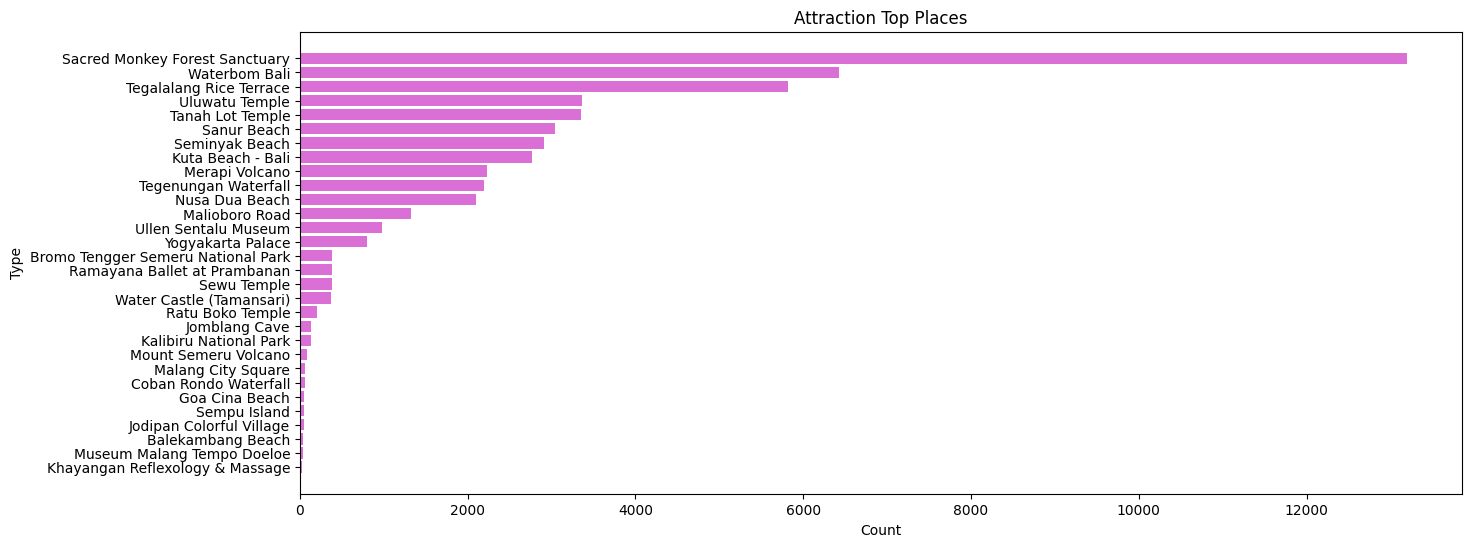

In [ ]:
att = data_use_rating['Attraction'].value_counts().sort_values(ascending =True)
plt.figure(figsize=(15, 6))
plt.barh(att.index, att.values, color='orchid')
plt.ylabel('Type')
plt.xlabel('Count')
plt.title('Attraction Top Places')
plt.show()


5 favorit destinasi wisata dengan jumlah pengunjung wisata terbanyak terdapat pada tempat wisata Bali:
- Sacred Monkey Forest Sactuary = ±13000 pengunjung
- Waterbom Bali = ±7000 pengunjung
- Tegalalang Rice Terrace = ±5800 pengunjung
- Uluwatu temple = ±3800 pengunjung
- Tanah Lot Temple = ±3800 pengunjung

##### EDA melihat jumlah rating -> keseluruhan destinasi wisata di Indonesia

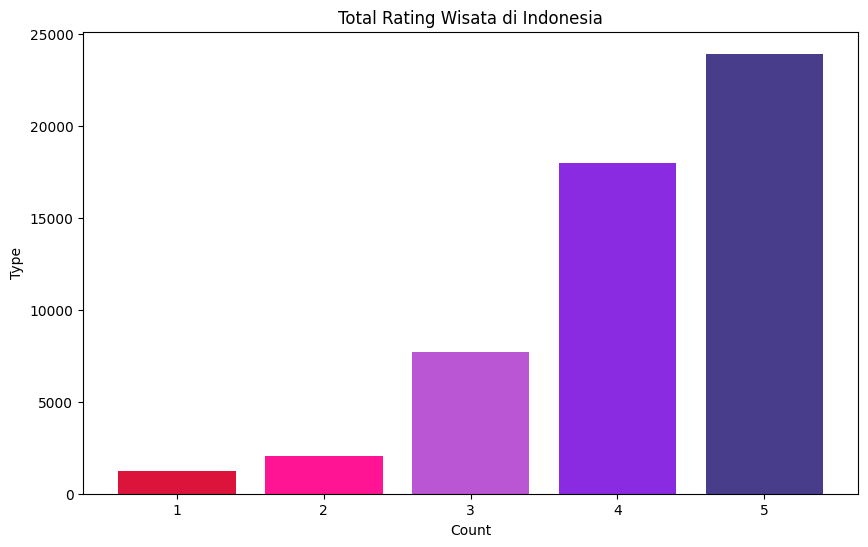

In [ ]:
rate = data_use_rating['Rating'].value_counts().sort_values(ascending =True)
plt.figure(figsize=(10, 6))
plt.bar(rate.index, rate.values, color=['crimson', 'deeppink', 'mediumorchid', 'blueviolet','darkslateblue'])  # Menggunakan plt.barh untuk bar chart horizontal
plt.ylabel('Type')  # Label untuk sumbu y
plt.xlabel('Count')  # Label untuk sumbu x
plt.title('Total Rating Wisata di Indonesia')
plt.show()

Keseluruhan tempat wisata di Indonesia didominasi rating 5. Sehingga, wisata-wisata Indonesia merupakan destinasi wisatawan yang menyenangkan.

##### EDA melihat jumlah rating -> masing-masing wisata Indenesia (yang banyak dikunjungi wisatawan)

Mengkonversi data menggunakan cross tab sehingga nilai freskuensi pada masing-masing nilai kolom yang ditentukan

In [ ]:
import pandas as pd
rate_10 = data_use_rating
crosstab_count = pd.crosstab(rate_10['Attraction'], rate_10['Rating'])
crosstab_count['count'] = crosstab_count.sum(axis=1)
crosstab_count.sort_values(by='count', ascending=False, inplace=True)
crosstab_count

Rating,1,2,3,4,5,count
Attraction,,,,,,
Sacred Monkey Forest Sanctuary,223,272,1592,4781,6330,13198
Waterbom Bali,39,43,229,1529,4589,6429
Tegalalang Rice Terrace,110,230,879,2011,2585,5815
Uluwatu Temple,46,109,421,1269,1514,3359
Tanah Lot Temple,50,115,476,1202,1509,3352
Sanur Beach,63,173,606,1133,1069,3044
Seminyak Beach,145,233,625,966,945,2914
Kuta Beach - Bali,331,308,664,806,656,2765
Merapi Volcano,42,81,415,817,880,2235


In [ ]:
att_all = crosstab_count.drop(columns='count')

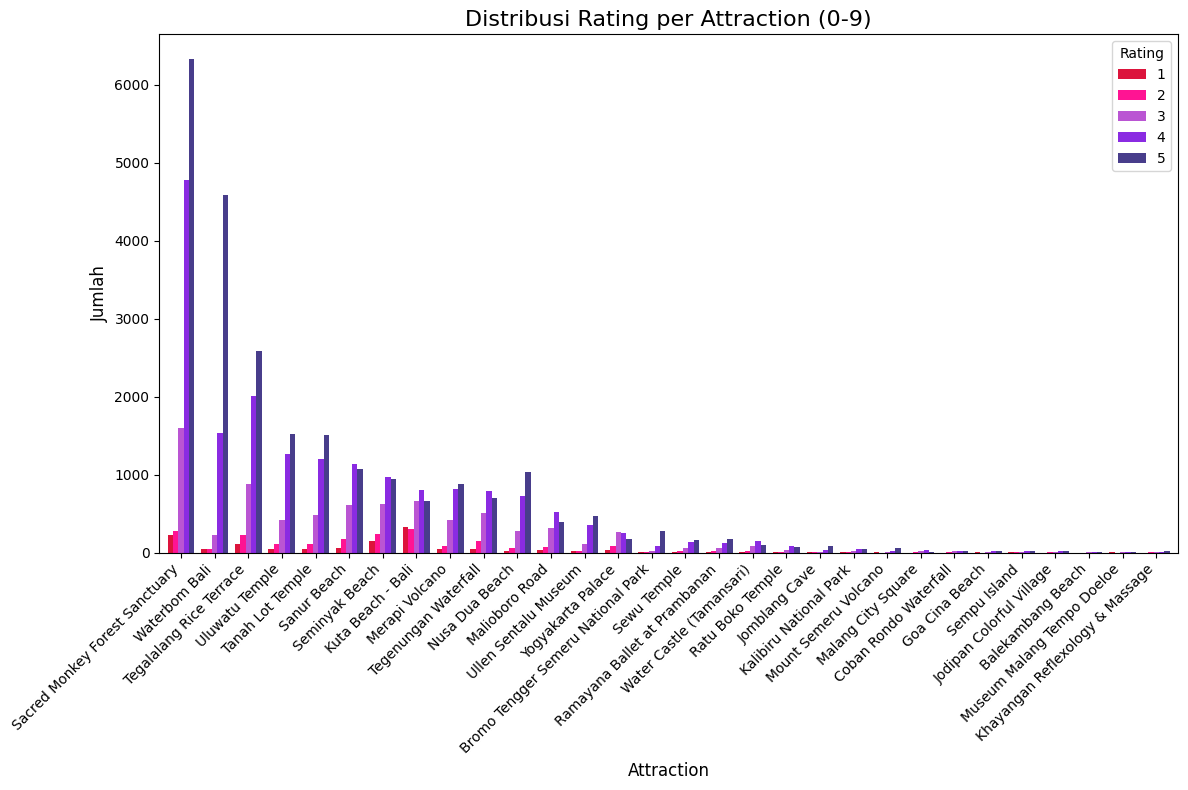

In [ ]:
att_all.plot(kind='bar', figsize=(12, 8), width=0.8, color=['crimson', 'deeppink', 'mediumorchid', 'blueviolet','darkslateblue'])
plt.title('Distribusi Rating per Attraction (0-9)', fontsize=16)
plt.xlabel('Attraction', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')


plt.tight_layout()
plt.show()

Berdasarkan visualisasi, 5 wisata di Bali dengan  jumlah pengunjung terbanyak memiliki jumlah rating diatas 3 banyak. Dapat disimpulkan Bali merupakan destinasi wisata favorit.

##### EDA melihat mode kunjungan -> keseluruhan wisata

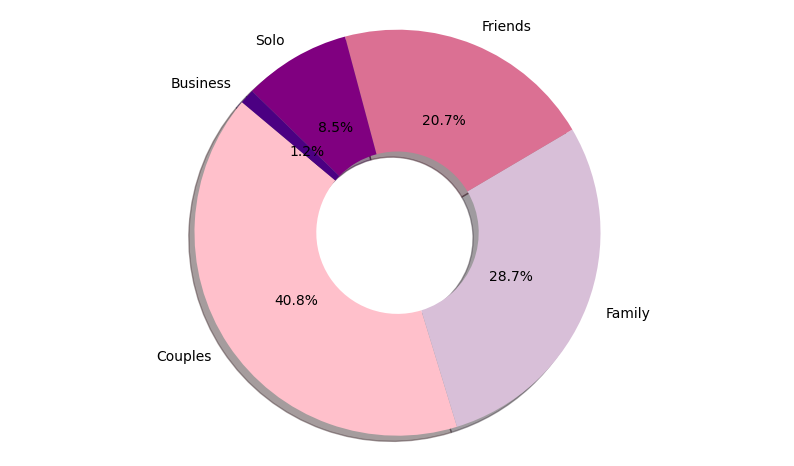

In [ ]:
mode_visit = data_use_rating['VisitMode'].value_counts()

colors = ['pink', 'thistle', 'palevioletred', 'purple', 'indigo']
plt.figure(figsize=(10, 5.8))
plt.pie(mode_visit.values, labels=mode_visit.index, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, wedgeprops=dict(width=0.6))
plt.axis('equal')
plt.show()

Mode kunjungan wisata di Indonesia didominasi pengunjung dengan kategori Couple/pasangan yaitu 40.8%

##### EDA melihat mode kunjungan tiap daerah -> Bali, Malang, Jawa Tengah

In [ ]:
mode_visit_1 = data_use_rating[data_use_rating['AttractionCityId'] ==1]
mode_visit_2 = data_use_rating[data_use_rating['AttractionCityId'] ==2]
mode_visit_3 = data_use_rating[data_use_rating['AttractionCityId'] ==3]
mode_visit_1 = mode_visit_1['VisitMode'].value_counts() #Bali
mode_visit_2 = mode_visit_2['VisitMode'].value_counts() #Malang
mode_visit_3 = mode_visit_3['VisitMode'].value_counts() #Jawa

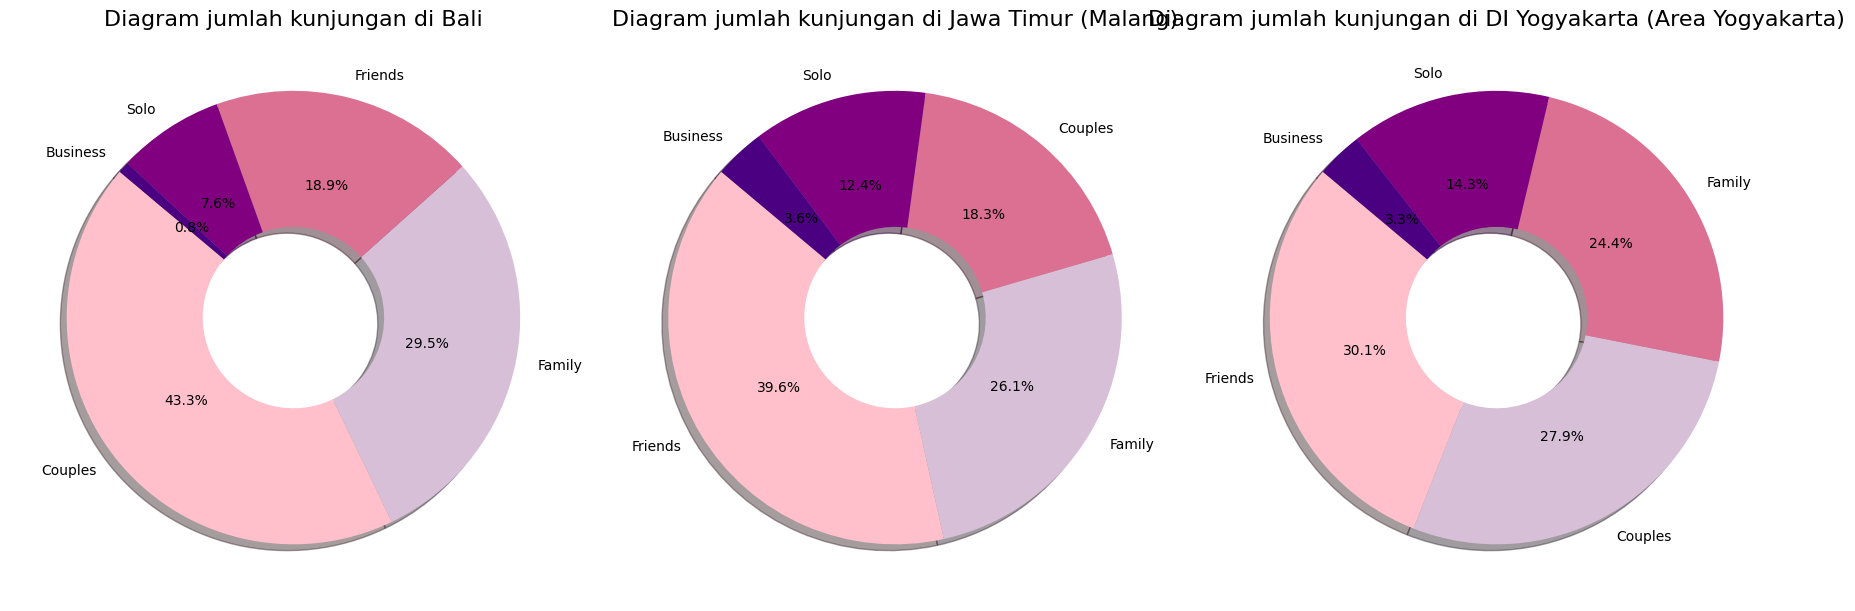

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))


colors = ['pink', 'thistle', 'palevioletred', 'purple', 'indigo']
#axs[0].figure(figsize=(10, 5.8))
axs[0].set_title('Diagram jumlah kunjungan di Bali', fontsize=16) # Use set_title to set the title
axs[0].pie(mode_visit_1.values, labels=mode_visit_1.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, wedgeprops=dict(width=0.6))
axs[0].axis('off')


axs[1].set_title('Diagram jumlah kunjungan di Jawa Timur (Malang)', fontsize=16) # Use set_title to set the title
axs[1].pie(mode_visit_2.values, labels=mode_visit_2.index, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, wedgeprops=dict(width=0.6))
axs[1].axis('off')


axs[2].set_title('Diagram jumlah kunjungan di DI Yogyakarta (Area Yogyakarta)', fontsize=16) # Use set_title to set the title
axs[2].pie(mode_visit_3.values, labels=mode_visit_3.index, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, wedgeprops=dict(width=0.6))
axs[2].axis('off')
plt.tight_layout()
plt.show()


- Wisata di Bali merupakan cocok untuk mode kunjungan wisatawan Couple dilihat dari diagram diatas. Lalu disusul mode kunjungan Family dan Friends.
- Wisata di Malang Jawa Timur merupakan cocok untuk mode kunjungan wisatawan Friends dilihat dari diagram diatas. Lalu disusul mode kunjungan Family dan Couple.
- Wisata di Yogyakarta DI Yogyakarta merupakan cocok untuk mode kunjungan wisatawan Friends dilihat dari diagram diatas. Lalu disusul mode kunjungan Couple dan Family.


##### EDA melihat mode kunjungan -> terhadap jenis wisata

In [ ]:
mode_tab = data_use_rating
crosstab_count2 = pd.crosstab(mode_tab['AttractionType'], mode_tab['VisitMode'])
crosstab_count2['count'] = crosstab_count2.sum(axis=1)
crosstab_count2.sort_values(by='count', ascending=False, inplace=True)
crosstab_count2

VisitMode,Business,Couples,Family,Friends,Solo,count
AttractionType,,,,,,
Nature & Wildlife Areas,59,6391,3125,2467,1209,13251
Beaches,153,4964,2894,1971,935,10917
Religious Sites,77,2990,1706,1464,474,6711
Water Parks,21,1359,3942,1000,107,6429
Points of Interest & Landmarks,45,2906,1298,1357,646,6252
Volcanos,90,518,615,819,276,2318
Waterfalls,18,1082,506,490,149,2245
Flea & Street Markets,53,409,310,309,243,1324
History Museums,36,249,242,321,130,978


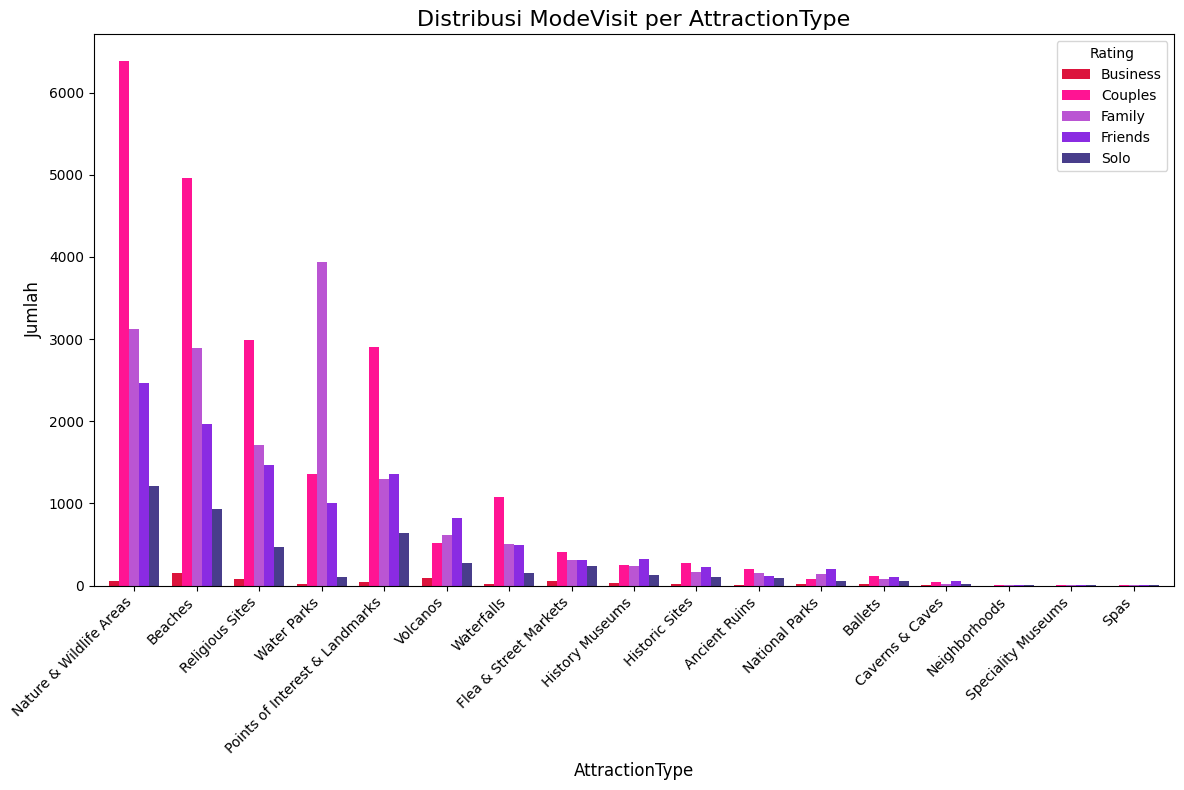

In [ ]:

crosstab_count2 = crosstab_count2.drop(columns='count')
crosstab_count2.plot(kind='bar', figsize=(12, 8), width=0.8, color=['crimson', 'deeppink', 'mediumorchid', 'blueviolet','darkslateblue'])


plt.title('Distribusi ModeVisit per AttractionType', fontsize=16)
plt.xlabel('AttractionType', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')


plt.tight_layout()
plt.show()

Bedasarkan 5 jenis wisata dengan jumlah pengunjung terbanyak, wisatawan Couple akan mengunjungi jenis wisata Nature Wilds Area, Beaches, Religious Sites, Points of Interest and Landmarks. Untuk kunjungan Family adalah jenis wisata Water Parks

Summary Visualisasi Data dalam rentang waktu Oktober 2022 - January 2023: Wisata berlokasi di Bali merupakan tujuan wisatawan terbanyak dibandingkan lokasi Malang Jawa Timur dan Yogyakarta area DI Yogyakarta. Wisata di Bali didominasi wisatawan adalah jenis wisata Nature & Wildlife Areas, Water Parks, Points of Interest & Landmarks, Religious Sites. Selain itu banyak pengunjung dengan tujuan daerah Bali dengan pengunjung Couple disusul pengunjung Familiy dan Friends. Sacred Monkey Forest Sactuary merupakan wisata Nature & Wildlife Areas terfavorit wisatawan dengan rating lebih dari 3 dari wisata di Bali lainnya.

### 4. Data Preparation

##### 4. 1 Data Prepertaion untuk Modelling Content Based -> Cosine Similarity

###### 4. 1. 1 Pre-processing data - Text Cleaning

Pada value kolom NewAttraction dan NewAttractionType setiap kata terdapat spasi, jika dilakukan mapping Vectorizer akan menampilkan value kolom yang tidak sesuai. Sehingga perlu cleaning teks pada simbol-simbol dan mengganti spasi dengan underscore

In [ ]:
df_content.head(5)

,Attraction,AttractionAddress,AttractionType
0,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
1,Waterbom Bali,"Jl. Kartika Plaza, Kuta 80361 Indonesia",Water Parks
2,Seminyak Beach,Seminyak,Beaches
3,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia",Beaches
4,Sanur Beach,Sanur,Beaches


In [ ]:
import re

In [ ]:
def cleaningText(text):
  text = re.sub(r'-|\(|\)', '', text)
  text = re.sub(r'&', 'and', text)
  text = re.sub(r' ', '_', text)
  return text


In [ ]:
df_content['NewAttraction'] = df_content['Attraction'].apply(cleaningText)
df_content['NewAttractionType'] = df_content['AttractionType'].apply(cleaningText)


###### 4. 1. 2 Melihat nilai Unik Item (gabungan) yang akan digunakan

In [ ]:
print(len(df_content['NewAttraction']))
df_content['NewAttraction'].unique()

30


array(['Sacred_Monkey_Forest_Sanctuary', 'Waterbom_Bali',
       'Seminyak_Beach', 'Nusa_Dua_Beach', 'Sanur_Beach',
       'Uluwatu_Temple', 'Tegalalang_Rice_Terrace',
       'Tegenungan_Waterfall', 'Tanah_Lot_Temple', 'Kuta_Beach__Bali',
       'Bromo_Tengger_Semeru_National_Park', 'Mount_Semeru_Volcano',
       'Jodipan_Colorful_Village', 'Sempu_Island', 'Balekambang_Beach',
       'Coban_Rondo_Waterfall', 'Goa_Cina_Beach', 'Malang_City_Square',
       'Museum_Malang_Tempo_Doeloe', 'Khayangan_Reflexology_and_Massage',
       'Jomblang_Cave', 'Kalibiru_National_Park', 'Malioboro_Road',
       'Merapi_Volcano', 'Ramayana_Ballet_at_Prambanan',
       'Ratu_Boko_Temple', 'Sewu_Temple', 'Ullen_Sentalu_Museum',
       'Water_Castle_Tamansari', 'Yogyakarta_Palace'], dtype=object)

###### 4. 1. 3 Feature Engineering - TF-IDF Vectorizer

Step 1: Membersihkan nilai kolom string dan mengganti space menjadi underscore -> dimana agar membentuk fitur dari nama-nama unik yang diekstraksi dari semua nama di kolom NewAttraction.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(df_content['NewAttraction'])

print(tf.get_feature_names_out())
len(tf.get_feature_names_out())

['balekambang_beach' 'bromo_tengger_semeru_national_park'
 'coban_rondo_waterfall' 'goa_cina_beach' 'jodipan_colorful_village'
 'jomblang_cave' 'kalibiru_national_park'
 'khayangan_reflexology_and_massage' 'kuta_beach__bali'
 'malang_city_square' 'malioboro_road' 'merapi_volcano'
 'mount_semeru_volcano' 'museum_malang_tempo_doeloe' 'nusa_dua_beach'
 'ramayana_ballet_at_prambanan' 'ratu_boko_temple'
 'sacred_monkey_forest_sanctuary' 'sanur_beach' 'seminyak_beach'
 'sempu_island' 'sewu_temple' 'tanah_lot_temple' 'tegalalang_rice_terrace'
 'tegenungan_waterfall' 'ullen_sentalu_museum' 'uluwatu_temple'
 'water_castle_tamansari' 'waterbom_bali' 'yogyakarta_palace']


30

###### 4. 1. 4 Feature Engineering - Transfomasi nilai TF-IDF Vectorizer ke bentuk matrix

Step 2: Mentranformasi ke bentuk matrix sehingga terbentuk baris dari Step 1/nama-nama unik New ATtraction dan kolom sejumlah item yang akan digunakan sebagai content-based yaitu kolom NewAttractionType.

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df_content['NewAttractionType'])

# Melihat ukuran matrix tfidf
print("jumlah baris dan kolom = ", tfidf_matrix.shape)
print(tfidf_matrix)

jumlah baris dan kolom =  (30, 17)
  (0, 8)	1.0
  (1, 15)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (4, 2)	1.0
  (5, 11)	1.0
  (6, 10)	1.0
  (7, 16)	1.0
  (8, 11)	1.0
  (9, 2)	1.0
  (10, 7)	1.0
  (11, 14)	1.0
  (12, 9)	1.0
  (13, 8)	1.0
  (14, 2)	1.0
  (15, 16)	1.0
  (16, 2)	1.0
  (17, 10)	1.0
  (18, 13)	1.0
  (19, 12)	1.0
  (20, 3)	1.0
  (21, 7)	1.0
  (22, 4)	1.0
  (23, 14)	1.0
  (24, 1)	1.0
  (25, 0)	1.0
  (26, 0)	1.0
  (27, 6)	1.0
  (28, 10)	1.0
  (29, 5)	1.0


Membentuk Data Frame dengan index dari nilai-nilai Attraction (nama wisata) dan kolom dari nilai-nilai Attraction Type (jenis wisata). Jika nilai 1 merupakan nilai index (Attraction/wisata) yang memiliki jenis tersebut pada kolom (AttractionType/jenis wisata)



In [ ]:
df = pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=df_content.NewAttraction
)#.sample(22, axis=1).sample(10, axis=0)
df

,ancient_ruins,ballets,beaches,caverns_and_caves,flea_and_street_markets,historic_sites,history_museums,national_parks,nature_and_wildlife_areas,neighborhoods,points_of_interest_and_landmarks,religious_sites,spas,speciality_museums,volcanos,water_parks,waterfalls
NewAttraction,,,,,,,,,,,,,,,,,
Sacred_Monkey_Forest_Sanctuary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Waterbom_Bali,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Seminyak_Beach,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nusa_Dua_Beach,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sanur_Beach,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Uluwatu_Temple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Tegalalang_Rice_Terrace,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Tegenungan_Waterfall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Tanah_Lot_Temple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


##### 4. 2 Data Preparation untuk Modelling Collaborative Based -> Neural Network RecommenderNet

###### 4. 2. 1 Mengokonversi nilai nilai yang akan digunakan untuk input model dalam bentuk angka -> menggunakan encoding

- Nilai kolom UserId

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = data_use_rating['UserId'].unique().tolist()
print('list UserId: ', user_ids)

# Proses encoding userID -> UserId : Encode
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded UserId : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID -> Encode : UserId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke UserId: ', user_encoded_to_user)

list UserId:  [70456, 7567, 79069, 31019, 43611, 43471, 76492, 20977, 18655, 62907, 86054, 41979, 38726, 67147, 2307, 3660, 50130, 30450, 82637, 33716, 46517, 50127, 61876, 16769, 9804, 44419, 84531, 83915, 62742, 47615, 85459, 71946, 54719, 16291, 18137, 37338, 18628, 47542, 71155, 73515, 1953, 31372, 35045, 79488, 14186, 78554, 30511, 50138, 83974, 40006, 50311, 56894, 36421, 62902, 61175, 61849, 51784, 61709, 64920, 27538, 27449, 64392, 79911, 55535, 51283, 73796, 21207, 23868, 13954, 55381, 71073, 113, 16816, 41624, 33038, 46031, 81844, 64368, 51849, 53252, 29563, 66839, 42947, 77269, 4371, 25561, 16514, 52730, 21256, 45191, 81154, 57365, 85847, 59810, 16482, 45653, 70967, 63138, 17811, 10370, 28567, 43435, 25621, 24948, 14459, 57716, 77961, 32533, 8481, 53690, 51055, 62791, 23746, 46065, 58995, 75223, 11099, 39393, 4453, 53132, 34227, 18600, 78886, 18325, 30475, 51292, 74902, 30233, 42707, 25682, 38154, 44234, 22217, 12892, 47829, 21300, 17884, 53500, 76106, 47053, 85394, 87911, 7

- Nilai kolom AttractionId

In [ ]:
# Mengubah placeID menjadi list tanpa nilai yang sama
att_ids = data_use_rating['AttractionId'].unique().tolist()

# Melakukan proses encoding AttractionId -> AttractionId : Encode
att_to_att_encoded = {x: i for i, x in enumerate(att_ids)}
print('encoded AttractionId : ', user_to_user_encoded)
# Melakukan proses encoding angka ke AttractionId -> Encode : AttractionId
att_encoded_to_att = {i: x for i, x in enumerate(att_ids)}
print('encoded angka ke AttractionId: ', att_encoded_to_att)

encoded AttractionId :  {70456: 0, 7567: 1, 79069: 2, 31019: 3, 43611: 4, 43471: 5, 76492: 6, 20977: 7, 18655: 8, 62907: 9, 86054: 10, 41979: 11, 38726: 12, 67147: 13, 2307: 14, 3660: 15, 50130: 16, 30450: 17, 82637: 18, 33716: 19, 46517: 20, 50127: 21, 61876: 22, 16769: 23, 9804: 24, 44419: 25, 84531: 26, 83915: 27, 62742: 28, 47615: 29, 85459: 30, 71946: 31, 54719: 32, 16291: 33, 18137: 34, 37338: 35, 18628: 36, 47542: 37, 71155: 38, 73515: 39, 1953: 40, 31372: 41, 35045: 42, 79488: 43, 14186: 44, 78554: 45, 30511: 46, 50138: 47, 83974: 48, 40006: 49, 50311: 50, 56894: 51, 36421: 52, 62902: 53, 61175: 54, 61849: 55, 51784: 56, 61709: 57, 64920: 58, 27538: 59, 27449: 60, 64392: 61, 79911: 62, 55535: 63, 51283: 64, 73796: 65, 21207: 66, 23868: 67, 13954: 68, 55381: 69, 71073: 70, 113: 71, 16816: 72, 41624: 73, 33038: 74, 46031: 75, 81844: 76, 64368: 77, 51849: 78, 53252: 79, 29563: 80, 66839: 81, 42947: 82, 77269: 83, 4371: 84, 25561: 85, 16514: 86, 52730: 87, 21256: 88, 45191: 89, 811

###### 4. 2. 2 Melakukan mapping nilai encoded ke data yang akan digunakan

In [ ]:

data_use_rating['user'] = data_use_rating['UserId'].map(user_to_user_encoded)


data_use_rating['att'] = data_use_rating['AttractionId'].map(att_to_att_encoded)
data_use_rating

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitMode,user,att
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples,0,0
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Friends,1,0
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Family,2,0
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Family,3,0
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples,27502,29
52926,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples,33529,29
52927,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples,33529,29
52928,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples,33529,29


###### 4. 2. 3 Melihat jumlah UserId, AttractionID dan Rating sebagai atribut yang akan digunakan

In [ ]:
import numpy as np

In [ ]:
num_users = len(user_to_user_encoded)
print(num_users)


num_att = len(att_encoded_to_att)
print(num_att)

# Mengubah rating menjadi nilai float
data_use_rating['Rating'] = data_use_rating['Rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(data_use_rating['Rating'])

# Nilai maksimal rating
max_rating = max(data_use_rating['Rating'])

print('Number of User: {}, Number of Attraction: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_att, min_rating, max_rating
))

33530
30
Number of User: 33530, Number of Attraction: 30, Min Rating: 1.0, Max Rating: 5.0


###### 4. 2. 4 Data Splitting rasio 80:20

In [ ]:
data_use_rating = data_use_rating.sample(frac=1, random_state=42)
data_use_rating

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitMode,user,att
32962,69024,68981,2018,10,2,748,5.0,1,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Couples,1060,6
33384,69621,77600,2017,11,2,748,5.0,1,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Couples,20176,6
21862,34452,55414,2016,2,2,673,3.0,1,13,Seminyak Beach,Seminyak,Beaches,Couples,4912,2
842,1719,54292,2019,7,3,640,4.0,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Family,785,0
31383,66893,86655,2019,8,2,748,5.0,1,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Couples,24082,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,16047,73351,2013,11,5,640,4.0,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Solo,9884,0
44732,147190,40894,2016,7,3,369,5.0,1,13,Kuta Beach - Bali,Kuta,Beaches,Family,14002,9
38158,100277,30169,2017,6,4,749,4.0,1,93,Tegenungan Waterfall,"Jl. Raya Tegenungan, Kemenuh, Ubud 80581 Indon...",Waterfalls,Friends,3508,7
860,1743,4959,2019,7,2,640,5.0,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples,803,0


In [ ]:
x = data_use_rating[['user', 'att']].values
y = data_use_rating['Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * data_use_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

print(len(x_train))
print(len(x_val))

[[ 1060     6]
 [20176     6]
 [ 4912     2]
 ...
 [ 3508     7]
 [  803     0]
 [ 2093     1]] [1.   1.   0.5  ... 0.75 1.   0.75]
42344
10586


##### 4. 3 Data Preparation untuk Modelling Collaborative Based -> SVD

##### 4. 3. 1 Menginstall library untuk implementasi algortima SVD

In [ ]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357269 sha256=d0f6d7845be36eceae1cf91a28574bb7f3730098c3cca061b4101df9ef8ab911
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

##### 4. 3. 2 Persiapan data yang akan digunakan

In [ ]:
data_use_rating

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitMode,user,att
32962,69024,68981,2018,10,2,748,5.0,1,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Couples,1060,6
33384,69621,77600,2017,11,2,748,5.0,1,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Couples,20176,6
21862,34452,55414,2016,2,2,673,3.0,1,13,Seminyak Beach,Seminyak,Beaches,Couples,4912,2
842,1719,54292,2019,7,3,640,4.0,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Family,785,0
31383,66893,86655,2019,8,2,748,5.0,1,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Couples,24082,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,16047,73351,2013,11,5,640,4.0,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Solo,9884,0
44732,147190,40894,2016,7,3,369,5.0,1,13,Kuta Beach - Bali,Kuta,Beaches,Family,14002,9
38158,100277,30169,2017,6,4,749,4.0,1,93,Tegenungan Waterfall,"Jl. Raya Tegenungan, Kemenuh, Ubud 80581 Indon...",Waterfalls,Friends,3508,7
860,1743,4959,2019,7,2,640,5.0,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples,803,0


In [ ]:
data_SVD = data_use_rating[['UserId', 'AttractionId', 'Rating']]
data_SVD

,UserId,AttractionId,Rating
32962,68981,748,5.0
33384,77600,748,5.0
21862,55414,673,3.0
842,54292,640,4.0
31383,86655,748,5.0
...,...,...,...
11284,73351,640,4.0
44732,40894,369,5.0
38158,30169,749,4.0
860,4959,640,5.0


##### 4. 3. 3 Mengubah DataFrame menjadi format standar library Suprise dan membuat skala rating 1-5 untuk

In [ ]:
reader = Reader(rating_scale=(1, 5))
data_SVD_use = Dataset.load_from_df(data_SVD, reader)
trainset = data_SVD_use.build_full_trainset()

print("Data pengguna-item dalam trainset:")
for uid, iid, true_r in trainset.all_ratings():
    print(f"UserId: {uid}, AttId: {iid}, Rating: {true_r}")

Streaming output truncated to the last 5000 lines.
UserId: 28799, AttId: 7, Rating: 5.0
UserId: 28800, AttId: 2, Rating: 4.0
UserId: 28801, AttId: 12, Rating: 4.0
UserId: 28802, AttId: 13, Rating: 2.0
UserId: 28803, AttId: 2, Rating: 5.0
UserId: 28804, AttId: 2, Rating: 5.0
UserId: 28805, AttId: 2, Rating: 3.0
UserId: 28806, AttId: 2, Rating: 4.0
UserId: 28807, AttId: 2, Rating: 4.0
UserId: 28808, AttId: 5, Rating: 5.0
UserId: 28809, AttId: 12, Rating: 4.0
UserId: 28810, AttId: 0, Rating: 5.0
UserId: 28811, AttId: 2, Rating: 5.0
UserId: 28812, AttId: 2, Rating: 5.0
UserId: 28813, AttId: 17, Rating: 1.0
UserId: 28814, AttId: 3, Rating: 4.0
UserId: 28815, AttId: 1, Rating: 5.0
UserId: 28816, AttId: 7, Rating: 5.0
UserId: 28817, AttId: 17, Rating: 2.0
UserId: 28818, AttId: 8, Rating: 5.0
UserId: 28819, AttId: 7, Rating: 5.0
UserId: 28819, AttId: 7, Rating: 5.0
UserId: 28820, AttId: 6, Rating: 4.0
UserId: 28821, AttId: 1, Rating: 4.0
UserId: 28822, AttId: 7, Rating: 5.0
UserId: 28823, AttI

###### 5. Build Model

#### 5. 1 Content Based

##### 5. 1. 1 Build Model menggunakan Cosine Similarity

###### 5. 1. 1. 1 Menghitung nilai kesamaan antar item yang digunakan -> Cosine Similarity

Cosine similarity mengukur kesamaan antara dua vektor dan menentukan apakah kedua vektor tersebut menunjuk ke arah yang sama. Ia menghitung sudut cosinus antara dua vektor. Semakin kecil sudut cosinus, semakin besar nilai cosine similarity.
Pada step ini menghitung kesamaan antara NewAttraction (nama wisata) dengan NewAttraction (nama wisata) lainnya berdasarkan kesamaan pada item NewAttractionType. Sehingga nilai 1 merupakan nilai suatu NewAttraction (nama wisata) memiliki kesamaan item (NewAttractionType) antar NewAttraction (nama wisata) lainnya. Sebaliknya nilai 0 tidak memiliki kesamaan sama sekali

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_content['NewAttraction'], columns=df_content['NewAttraction'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df#.sample(5, axis=1).sample(10, axis=0)

Shape: (30, 30)


NewAttraction,Sacred_Monkey_Forest_Sanctuary,Waterbom_Bali,Seminyak_Beach,Nusa_Dua_Beach,Sanur_Beach,Uluwatu_Temple,Tegalalang_Rice_Terrace,Tegenungan_Waterfall,Tanah_Lot_Temple,Kuta_Beach__Bali,...,Jomblang_Cave,Kalibiru_National_Park,Malioboro_Road,Merapi_Volcano,Ramayana_Ballet_at_Prambanan,Ratu_Boko_Temple,Sewu_Temple,Ullen_Sentalu_Museum,Water_Castle_Tamansari,Yogyakarta_Palace
NewAttraction,,,,,,,,,,,,,,,,,,,,,
Sacred_Monkey_Forest_Sanctuary,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Waterbom_Bali,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Seminyak_Beach,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nusa_Dua_Beach,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sanur_Beach,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Uluwatu_Temple,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tegalalang_Rice_Terrace,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Tegenungan_Waterfall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tanah_Lot_Temple,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### 5. 1. 1. 2 Build Model -> Content-based filtering

step ini membangun model meggunakan top-N recommendation untuk memberikan sejumlah rekomendasi attraction pada pengguna yang diatur dalam parameter k (k: jumlah top k yang memiliki kesamaan terdekat dengan input)

In [ ]:
def attraction_recommendations(NewAttraction, similarity_data=cosine_sim_df, items=df_content[['NewAttraction', 'NewAttractionType', 'AttractionAddress']], k=10):

    index = similarity_data.loc[:,NewAttraction].to_numpy().argpartition(
        range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1].flatten()]
    closest = closest.drop(NewAttraction, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
df_content[df_content.NewAttraction.eq('Sanur_Beach')]

,Attraction,AttractionAddress,AttractionType,NewAttraction,NewAttractionType
4,Sanur Beach,Sanur,Beaches,Sanur_Beach,Beaches


###### 5. 1. 1. 3 Hasil model sistem rekomendasi Content-based Cosine Similarity

In [ ]:
Attraction = 'Sanur Beach'
Attraction = Attraction.replace(' ', '_')
Attraction

'Sanur_Beach'

In [ ]:
recommendation_10 = attraction_recommendations(Attraction)
recommendation_10['NewAttraction'] = recommendation_10['NewAttraction'].str.replace('_', ' ')
recommendation_10['NewAttractionType'] = recommendation_10['NewAttractionType'].str.replace('_', ' ')
recommendation_10 = recommendation_10[['NewAttraction', 'NewAttractionType', 'AttractionAddress']]

In [ ]:
recommendation_10

,NewAttraction,NewAttractionType,AttractionAddress
0,Balekambang Beach,Beaches,Malang District
1,Goa Cina Beach,Beaches,"Dusun Trowotratih, Desa Sitiarjo Kecamatan Sum..."
2,Kuta Beach Bali,Beaches,Kuta
3,Seminyak Beach,Beaches,Seminyak
4,Nusa Dua Beach,Beaches,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"
5,Sempu Island,Nature and Wildlife Areas,"Sumber Manjing Wetan, Malang 65111 Indonesia"
6,Jodipan Colorful Village,Neighborhoods,"Gang 1 Jodipan, Kesatrian, Kec. Blimbing, Mala..."
7,Mount Semeru Volcano,Volcanos,Malang Lumajang
8,Bromo Tengger Semeru National Park,National Parks,"Asrikaton - Pakis, Malang 65100 Indonesia"
9,Waterbom Bali,Water Parks,"Jl. Kartika Plaza, Kuta 80361 Indonesia"


In [ ]:
def recommendation_content1(Attraction):
  Attraction = Attraction.replace(' ', '_')
  recommendation_10 = attraction_recommendations(Attraction)
  recommendation_10['NewAttraction'] = recommendation_10['NewAttraction'].str.replace('_', ' ')
  recommendation_10['NewAttractionType'] = recommendation_10['NewAttractionType'].str.replace('_', ' ')
  recommendation_10 = recommendation_10[['NewAttraction', 'NewAttractionType', 'AttractionAddress']]
  n=0
  print("="*100)
  print("Recommendation System Content Based-Cosine Similarity")
  print("="*100)
  print("="*100)
  print("10 places to go based on item -->", Attraction.replace('_', ' '))
  print("="*100)
  for index, row in recommendation_10.iterrows():
    n+=1
    print(n, row.NewAttraction, ':', row.AttractionAddress)

**Manampilkan rekomendasi Top 10 Wisata -  content based Cosine Similarity**

In [ ]:
recommendation_content1('Sanur Beach')

Recommendation System Content Based-Cosine Similarity
10 places to go based on item --> Sanur Beach
1 Balekambang Beach : Malang District
2 Goa Cina Beach : Dusun Trowotratih, Desa Sitiarjo Kecamatan Sumbermanjing Wetan, Malang 65111 Indonesia
3 Kuta Beach  Bali : Kuta
4 Seminyak Beach : Seminyak
5 Nusa Dua Beach : Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia
6 Sempu Island : Sumber Manjing Wetan, Malang 65111 Indonesia
7 Jodipan Colorful Village : Gang 1 Jodipan, Kesatrian, Kec. Blimbing, Malang 65126 Indonesia
8 Mount Semeru Volcano : Malang Lumajang
9 Bromo Tengger Semeru National Park : Asrikaton - Pakis, Malang 65100 Indonesia
10 Waterbom Bali : Jl. Kartika Plaza, Kuta 80361 Indonesia


#### 5. 2 Collaborative Based

##### 5. 2. 1 Build Model menggunakan Neural Network RecommenderNet

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

###### 5. 2. 1. 1 Membuat parameter fungsi Neural Network

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_att, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_att = num_att
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.att_embedding = layers.Embedding( # layer embeddings attraction
        num_att,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.att_bias = layers.Embedding(num_att, 1) # layer embedding attractioon bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    att_vector = self.att_embedding(inputs[:, 1]) # memanggil layer embedding 3
    att_bias = self.att_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_att = tf.tensordot(user_vector, att_vector, 2)

    x = dot_user_att + user_bias + att_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model_nn = RecommenderNet(num_users, num_att, 35)
model_nn.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsoluteError]
)

###### 5. 2. 1. 2 Training Model

In [ ]:
# Memulai training

history = model_nn.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 15,
    validation_data = (x_val, y_val)
)

Epoch 1/15
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - loss: 0.5882 - mean_absolute_error: 0.2576 - root_mean_squared_error: 0.3019 - val_loss: 0.5181 - val_mean_absolute_error: 0.1951 - val_root_mean_squared_error: 0.2453
Epoch 2/15
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 55s 19ms/step - loss: 0.5298 - mean_absolute_error: 0.1882 - root_mean_squared_error: 0.2436 - val_loss: 0.5258 - val_mean_absolute_error: 0.2087 - val_root_mean_squared_error: 0.2529
Epoch 3/15
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 0.4996 - mean_absolute_error: 0.1823 - root_mean_squared_error: 0.2313 - val_loss: 0.5182 - val_mean_absolute_error: 0.2016 - val_root_mean_squared_error: 0.2468
Epoch 4/15
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 0.4911 - mean_absolute_error: 0.1761 - root_mean_squared_error: 0.2250 - val_loss: 0.5138 - val_mean_absolute_error: 0.1973 - val_root_mean_squared_error: 0.2430
Epoch 5/15
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - loss: 0.4842 - mean_absolute_error: 0.

###### 5. 2. 1. 3 Menampilkan grafik berdasarkan RMSE dan MAE

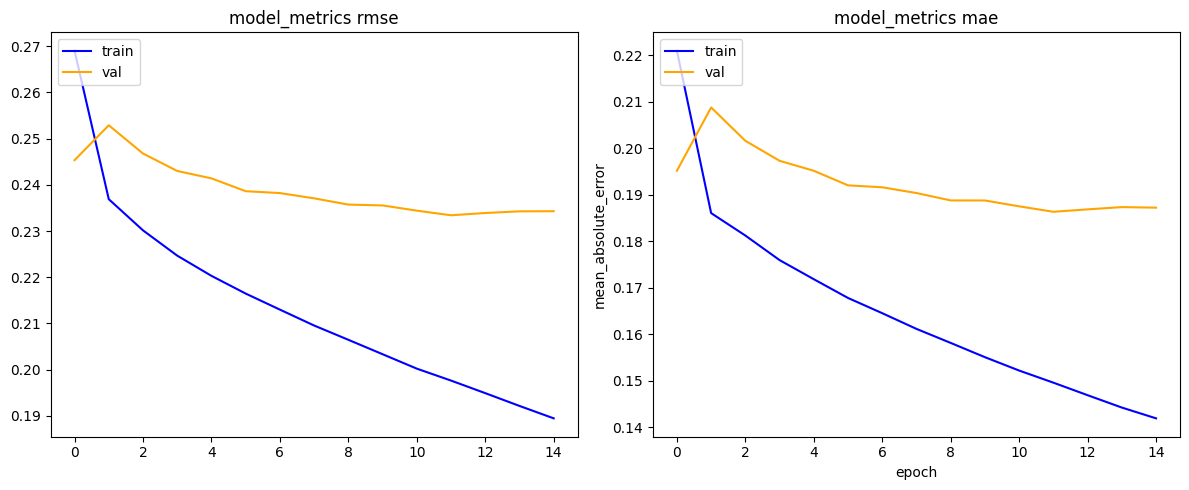

In [ ]:
#Diagram of rmse and mae training and testing
import matplotlib.pyplot as plt

rmse1_tr = history.history['root_mean_squared_error']
rmse1_ts = history.history['val_root_mean_squared_error']

mae1_tr = history.history['mean_absolute_error']
mae1_ts = history.history['val_mean_absolute_error']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(rmse1_tr, color='blue')
ax1.plot(rmse1_ts, color='orange')
ax1.set_title('model_metrics rmse')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(mae1_tr, color='blue')
ax2.plot(mae1_ts, color='orange')
ax2.set_title('model_metrics mae')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()


Nilai RMSE training pada epochs terakhir menunjukkan 0.19 dan testing nilai RMSE 0.23. Dimana selama training nilai RMSE menurun dan begitu nilai MAE dapat diartikan error semakin kecil

###### 5. 2. 1. 4 Hasil Model

In [ ]:
att_df = data_use_rating
user_id = data_use_rating.UserId.sample(1).iloc[0]
att_visited_by_user = data_use_rating[data_use_rating.UserId == user_id]
att_visited_by_user



,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitMode,user,att
37402,99187,9409,2016,6,4,749,3.0,1,93,Tegenungan Waterfall,"Jl. Raya Tegenungan, Kemenuh, Ubud 80581 Indon...",Waterfalls,Friends,25797,7
35355,72336,9409,2016,7,4,748,4.0,1,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Friends,25797,6
44775,147253,9409,2016,7,4,369,4.0,1,13,Kuta Beach - Bali,Kuta,Beaches,Friends,25797,9


In [ ]:
att_not_visited = att_df[~att_df['AttractionId'].isin(att_visited_by_user.AttractionId.values)]['AttractionId']

In [ ]:
att_not_visited_2 = list(
    set(att_not_visited)
    .intersection(set(att_to_att_encoded.keys()))
)

In [ ]:
att_not_visited_3 = [[att_to_att_encoded.get(x)] for x in att_not_visited_2]

In [ ]:
user_encoder = user_to_user_encoded.get(user_id)
user_att_array = np.hstack(
    ([[user_encoder]] * len(att_not_visited_3), att_not_visited_3)
)

In [ ]:
rec_dest = data_use_rating[['AttractionId','Attraction', 'AttractionType', 'VisitMode', 'AttractionAddress', 'att']]
rec_dest = rec_dest.drop_duplicates('att').sort_values(by='att')

**Manampilkan rekomendasi Top 10 Wisata - collaborative Neural Network RecommenderNet**

In [ ]:
ratings = model_nn.predict(user_att_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_att_ids = [
    att_encoded_to_att.get(att_not_visited_3[x][0]) for x in top_ratings_indices
]


print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Recent destinattion with high ratings from user')
print('----' * 8)


top_att_user = (
    att_visited_by_user.sort_values(
        by = 'Rating',
        ascending=False
    )
    .head(5)
    .att.values
)
att_df_rows = rec_dest[rec_dest['att'].isin(top_att_user)]
for row in att_df_rows.itertuples():
    print('[',row.AttractionType,']',row.Attraction, ':', row.AttractionAddress)
print('----' * 8)
print('10 places to go - recommended')
print('----' * 8)
recommended_att = rec_dest[rec_dest['AttractionId'].isin(recommended_att_ids)]
n = 0
for row in recommended_att.itertuples():
    n+=1
    print(n, '[',row.AttractionType,']',row.Attraction, ':', row.AttractionAddress)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Showing recommendations for users: 9409
Recent destinattion with high ratings from user
--------------------------------
[ Points of Interest & Landmarks ] Tegalalang Rice Terrace : Jalan Raya Ceking, Tegalalang 80517 Indonesia
[ Waterfalls ] Tegenungan Waterfall : Jl. Raya Tegenungan, Kemenuh, Ubud 80581 Indonesia
[ Beaches ] Kuta Beach - Bali : Kuta
--------------------------------
10 places to go - recommended
--------------------------------
1 [ Nature & Wildlife Areas ] Sacred Monkey Forest Sanctuary : Jl. Monkey Forest, Ubud 80571 Indonesia
2 [ Water Parks ] Waterbom Bali : Jl. Kartika Plaza, Kuta 80361 Indonesia
3 [ Beaches ] Nusa Dua Beach : Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia
4 [ Religious Sites ] Uluwatu Temple : Jl. Raya Uluwatu Southern part of Bali, Pecatu 80361 Indonesia
5 [ Religious Sites ] Tanah Lot Temple : Kecamatan Kediri, Kabupaten Tabanan, Beraban 82121 Indonesia
6 [ National Parks ] Bromo Tengger Semeru National P

##### 5. 2. 2 Build Model menggunakan Algortima SVD

SVD (Singular Value Decomposition) merupakan algoritma untuk sistem rekomendasi, terutama untuk menangani collaborative filtering berbasis matriks dekomposisi

Data yang telah dikonversi menjadi format struktur library Surprise akan dilatih menggunakan SVD, dan membentuk prediksi skor baru berdasarkan pelatihan data yang telah diformat struktur library Surprise

Training model akan menggunakan cross validation sebanyak 10 folds dan melihat metrik RMSE dan MAE


###### 5. 2. 2. 1 Membuat variabel model -> model menggunakan SVD(Singular Value Decomposition)

In [ ]:
model = SVD()

###### 5. 2. 2. 2 Melakukan Cross-Validation menggunakan 10 folds

In [ ]:
results = cross_validate(model, data_SVD_use, measures=['RMSE', 'MAE'], cv=10, verbose=True)
results

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8827  0.9152  0.9224  0.9010  0.9222  0.9005  0.9322  0.9077  0.9080  0.9212  0.9113  0.0136  
MAE (testset)     0.6946  0.7161  0.7176  0.7113  0.7176  0.7042  0.7245  0.7086  0.7074  0.7172  0.7119  0.0081  
Fit time          1.14    1.04    1.49    1.68    1.23    1.09    1.08    1.09    1.09    1.08    1.20    0.20    
Test time         0.07    0.03    0.05    0.05    0.05    0.06    0.03    0.03    0.06    0.04    0.05    0.01    


{'test_rmse': array([0.88269208, 0.91519518, 0.92237508, 0.90100779, 0.92218196,
        0.90052419, 0.93218926, 0.90774736, 0.90803603, 0.92116704]),
 'test_mae': array([0.69460799, 0.71607259, 0.71758492, 0.71134347, 0.71759475,
        0.70420004, 0.72448591, 0.70855073, 0.70737557, 0.71716744]),
 'fit_time': (1.1377489566802979,
  1.0368907451629639,
  1.4888842105865479,
  1.6834619045257568,
  1.2343249320983887,
  1.08876633644104,
  1.0809876918792725,
  1.0936050415039062,
  1.085176944732666,
  1.08152437210083),
 'test_time': (0.06639242172241211,
  0.02887129783630371,
  0.0461428165435791,
  0.04784226417541504,
  0.05071377754211426,
  0.06152009963989258,
  0.029755592346191406,
  0.028522491455078125,
  0.056550025939941406,
  0.04310321807861328)}

Berdasarkan nilai RMSE dari folds 1-10 menunjukkan nilai kecil yaitu 0.9 (dibawah 1, jika semakin besar cth 2.xx/5.xx maka buruk) dapat dikatakan prediksi baik. Dan nilai MAE yang kecil. Nilai STD menunjukkan nilai kecil sehingga hasil nilai MSE dan MAE masing-masing folds konsisten.

###### 5. 2. 2. 3 Hasil Model

In [ ]:
user_id

9409

In [ ]:
att_visited_by_user

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitMode,user,att
37402,99187,9409,2016,6,4,749,3.0,1,93,Tegenungan Waterfall,"Jl. Raya Tegenungan, Kemenuh, Ubud 80581 Indon...",Waterfalls,Friends,25797,7
35355,72336,9409,2016,7,4,748,4.0,1,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Points of Interest & Landmarks,Friends,25797,6
44775,147253,9409,2016,7,4,369,4.0,1,13,Kuta Beach - Bali,Kuta,Beaches,Friends,25797,9


Membuat data frame destinasi wisata yang belum dikunjungan dan membuat prediksi rating baru

In [ ]:
att_not_visited_SVD = item_joined[~item_joined['AttractionId'].isin(att_visited_by_user.AttractionId.values)]
att_not_visited_SVD.sort_values(by='AttractionId')

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType
1,481,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia",Beaches
2,640,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
3,650,1,13,Sanur Beach,Sanur,Beaches
4,673,1,13,Seminyak Beach,Seminyak,Beaches
5,737,1,76,Tanah Lot Temple,"Kecamatan Kediri, Kabupaten Tabanan, Beraban 8...",Religious Sites
8,824,1,76,Uluwatu Temple,"Jl. Raya Uluwatu Southern part of Bali, Pecatu...",Religious Sites
9,841,1,92,Waterbom Bali,"Jl. Kartika Plaza, Kuta 80361 Indonesia",Water Parks
10,877,2,13,Balekambang Beach,Malang District,Beaches
11,888,2,61,Bromo Tengger Semeru National Park,"Asrikaton - Pakis, Malang 65100 Indonesia",National Parks
12,897,2,93,Coban Rondo Waterfall,Malang District,Waterfalls


Memprediksi skor baru pada wisata (NewAttraction) yang belum dikunjungi. 10 prediksi baru teratas akan menjadi rekomendasi untuk user yang belum pernah dikunjungi

In [ ]:
trainset = data_SVD_use.build_full_trainset()
model.fit(trainset)

att_not_visited_SVD['Estimate_Score'] = att_not_visited_SVD['AttractionId'].apply(lambda x: model.predict(user_id, x).est)

att_not_visited_SVD = att_not_visited_SVD.drop(['AttractionId','AttractionCityId','AttractionTypeId'], axis = 1)

att_not_visited_SVD = att_not_visited_SVD.sort_values('Estimate_Score', ascending=False)
att_not_visited_SVD.reset_index(drop=True, inplace=True)
att_not_visited_SVD = att_not_visited_SVD.head(10) #top N recommendation (10 top)
att_not_visited_SVD

<ipython-input-89-5ef34a36cab2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  att_not_visited_SVD['Estimate_Score'] = att_not_visited_SVD['AttractionId'].apply(lambda x: model.predict(user_id, x).est)


,Attraction,AttractionAddress,AttractionType,Estimate_Score
0,Mount Semeru Volcano,Malang Lumajang,Volcanos,4.675635
1,Waterbom Bali,"Jl. Kartika Plaza, Kuta 80361 Indonesia",Water Parks,4.542507
2,Bromo Tengger Semeru National Park,"Asrikaton - Pakis, Malang 65100 Indonesia",National Parks,4.492497
3,Jomblang Cave,"Jetis Wetan, Pacarejo, Semanu 55581 Indonesia",Caverns & Caves,4.475565
4,Ullen Sentalu Museum,"Jl. Boyong Taman Wisata, 55581 Indonesia",History Museums,4.320427
5,Tanah Lot Temple,"Kecamatan Kediri, Kabupaten Tabanan, Beraban 8...",Religious Sites,4.307627
6,Khayangan Reflexology & Massage,Malang,Spas,4.304236
7,Sempu Island,"Sumber Manjing Wetan, Malang 65111 Indonesia",Nature & Wildlife Areas,4.271855
8,Jodipan Colorful Village,"Gang 1 Jodipan, Kesatrian, Kec. Blimbing, Mala...",Neighborhoods,4.217750
9,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Speciality Museums,4.109064


**Manampilkan rekomendasi Top 10 Wisata - collaborative based SVD**

In [ ]:
print('Showing recent for users: {}'.format(user_id))
print('---' * 20)
for row_user_recent in att_visited_by_user.itertuples():
    print('[',row_user_recent.AttractionType,']',row_user_recent.Attraction, ':', row_user_recent.AttractionAddress)

print('===' * 50)
print('===' * 50)
print('10 places to go - probably you sholud like')
print('---' * 20)
x = 0
for row_user_predict in att_not_visited_SVD.itertuples():
    x+=1
    print(x,'[',row_user_predict.AttractionType,']',row_user_predict.Attraction, ':', row_user_predict.AttractionAddress)

Showing recent for users: 9409
------------------------------------------------------------
[ Waterfalls ] Tegenungan Waterfall : Jl. Raya Tegenungan, Kemenuh, Ubud 80581 Indonesia
[ Points of Interest & Landmarks ] Tegalalang Rice Terrace : Jalan Raya Ceking, Tegalalang 80517 Indonesia
[ Beaches ] Kuta Beach - Bali : Kuta
10 places to go - probably you sholud like
------------------------------------------------------------
1 [ Volcanos ] Mount Semeru Volcano : Malang Lumajang
2 [ Water Parks ] Waterbom Bali : Jl. Kartika Plaza, Kuta 80361 Indonesia
3 [ National Parks ] Bromo Tengger Semeru National Park : Asrikaton - Pakis, Malang 65100 Indonesia
4 [ Caverns & Caves ] Jomblang Cave : Jetis Wetan, Pacarejo, Semanu 55581 Indonesia
5 [ History Museums ] Ullen Sentalu Museum : Jl. Boyong Taman Wisata, 55581 Indonesia
6 [ Religious Sites ] Tanah Lot Temple : Kecamatan Kediri, Kabupaten Tabanan, Beraban 82121 Indonesia
7 [ Spas ] Khayangan Reflexology & Massage : Malang
8 [ Nature & Wildli

###### 6. Evaluasi

Metrik pada model sistem rekomendasi berfokus pada RMSE dan MAE. RMSE merupakan mengukur akar dari rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual, sehingga dapat menekankan kesalahan yang lebih besar, karena nilai kesalahan dikuadratkan. Sehingga dengan nilai RMSE kecil menunjukkan nilai error yang kecil juga
Selain itu metrik MAE digunakan untuk mengukur kesalahan dengan nilai rata-rata absolut antara nilai prediksi dan nilai aktual. MAE membantu mengukur seberapa besar rata-rata perbedaan antara nilai aktual dan nilai prediksi. Dengan nilai MAE yang semakin kecil menunjukkan nilai kedua tersebut memiliki error yang kecil

1. Content based
Berdasarkan 2 teknik untuk menemukan pola hubungan antar item, penggunaan cosine_similarity dapat menunjukkan item yang memiliki kesamaan dengan item yang diinput. Cosine similarity merupakan metrik untuk mengukur kemiripan antara 2 vector dimana berdasarkan sudut kosinus. Pada atribut yang memiliki nilai 1 merupakan atribut yang memilki kesamaan sedangkan nilai 0 atribut tidak memiliki kesamaan
Hasil pengembangan menggunakan metode cosine similarity dapat menunjukkan 10 rekomendasi yang relate dengan input. Metode cosine similarity lebih memiliki kesamaan yang lebih dekat karena menggunakan skor kesamaan berbasis vektor dan kedua atribut memiliki hubungan/lineraritas (jenis wisata dan tempat wisata)


2. Collaborative based
Hasil penggunaan 2 algoritma adalah model dapat merekomendasi destinasi wisata. Pada penggunaan Neural Network menunjukkan nilai error MAE dan RMSE yang semakin rendah sekitar 0.19 sedangkan algoritma SVD sekitar 0.9-0.7. Algoritma NN dapat menunjukkan 10 rekomendasi teratas menyesuaikan jenis wisata yang mirip, frekuensi destinasi wisata yang banyak dikunjungi wisatawan dan rating detinasi wisata (membandingkan melihat hasil EDA-seperti jenis wisata yang sering muncul)
Pada algoritma SVD 10 rekomendasi teratas berdasarkan prediksi baru dari perhitungan fitur laten rating dan destinasi wisata. Sehingga rekomendasi menunjukkan destinasi wisata dengan kemiripan wisata yang tesembunyi (tidak terlalu menonjol dapat dilihat dengan perbandingan EDA) dan menghasilkan prediksi rating baru yang kemungkinan akan mirip dengan riwayat destinasi wisatawan. Sehingga model ini cocok untuk mengenalkan wisata baru.
Pada projek ini hasil sistem rekomendasi penggunaan algoritma NN menunjukkan nilai RMSE dan MAE lebih rendah dibandingkan menggunakan algoritma SVD. Selain itu hasil algoritma NN mendekati dengan hasil EDA dimana dengan jenis wisata dan destinasi wisata yang direkomendasikan sering muncul dan mendekati dengan jumlah rating yang tingga pada data, sesuai banyaknya riwayat kunjungan tiap pengunjung. Sedangkan SVD perlu dievaluasi kembali dan eksplore lagi pada proses training model karna saat ini menggunakan cross-validaton dan pengkonversian data yang menggunakan library surprise dan fitur laten.









Hasil pengembangan/proyek ini dapat menjawab probelm statement yang dijelaskan pada Business Undestanding sebagai berikut:
1. **Bagaimana langkah-langkah untuk membuat sistem rekomendasi untuk calon pengunjung berdasarkan referensi riwayat pengunjung?**
= Langkah membuat sistem rekomendasi adalah dengan metode sederhana CRISP-DM (Cross-Industry Standard Process for Data Mining) yaitu melakukan pengumpulan data, membersihkan data dan mempersiapkan data yang akan digunakan, mengimplementasi berdasarkan content-based dan collaborative-based, dan menetukan model berdasarkan MAE dan MSE pada sistem rekomdeasi collaborative-based. Hasil pengembangan model akan menghasilkan output top 10 rekomendasi berdasarkan input wisata yang diberikan.
2. **Bagaimana atribut-atribut referensi pengunjung-pengunjung untuk menentukan destinasi wisata?**
= Dengan menganalisis dan melihat visualisasi data kunjungan wisata. Analisis menunjukkan daerah wisata, tempat wisata, dan jenis kunjungan yang menjadi rekomendasi calon pengunjung. Berdasarkan pengembangan projek ini daerah Bali merupakan daerah favorit bagi pengunjung couple. Selain itu wisata di Bali, jenis atraksi Nature & Wildlife Areas merupakan jenis atraksi yang disukai banyak wisatawan.
3. **Bagaimana cara membangun model Machine Learning sebagai solusi untuk merekomendasikan destinasi wisata untuk calon pengunjung berdasarakan preferensi pengunjung tersebut?**
= Setelah melakukan pengembangan CRISP-DM, akan menentukan berdasarkan nilai MAE dan MSE yang menunjukkan nilai error yang paling kecil. Pada metode content-based metode cosine similarity lebih cocok dengan kondisi data saat ini yang mana 2 atribut yang memiliki hubungan linear. Untuk metode collaborative-based menggunakan Neural Network RecommenderNet dari Library keras menampilkan nilai RMSE MAE sekitar 0.20, sedangkan menggunakan SVD dari library Surprise menampilkan nilai RMSE MAE sekitar 0.80. Dengan arti model Neural network RecommenderNet menunjukkan nilai MAE RMSE lebih rendah. Maka implementasi lebih baik menggunakan Neural Network

Poin-poin diatas dapat menjawab goals dimana:
1. Dapat merekomendasikan tujuan wisata sesuai prefernsinya berdasarkan referensi riwayat pengunjung-pengunjung sebelumnya yang memiliki kesamaan preferensi tujuan wisata,
2. Dapat melihat atribut referensi pengunjung untuk menentukan destinasi wisata,
3.  Dapat meningkatkan kepuasan para pengunjung wisaata sesuai preferensinya berdasarkan hasail sistem rekomendasi,
4. Dapat mengurangi penilaian rendah pada destinasi wisata karena wisata yang dituju akan sesuai referensi calon wistawan,
5. Dapat meningkatkan daya tarik wisata di Indonesia dan menaikkan pendapatan untuk pekerja dan sektor ekonomi negara

Solusi proses pengembangan/penilitian yang diterapkan projek ssitem rekomendasi destinasi wisata dapat berdampak besar untuk menaikkan daya tarik wisata untuk calon wisatawan dan dapat menaikkan perekonomian dari sektor pariwisata di Indonesia.